# Vježbe 9 - Neuronske mreže

Na predavanju ste se upoznali s konceptom neuronskih mreža. <br>
Malo ćemo ponoviti osnove pojmove. Pogledajmo prvo arhitekturu mreže na slici <br>

Neuronska mreža se sastoji od slojeva, a  svaki sloj sadrži aktivacijske jedinice. **Prvi** i **zadnji** sloj su **ulazni** podaci odnosno, **izlazne** vrijednosti. <br>
Svi slojevi između se nazivaju **skrivenim** slojevima. <br> 
Svaka jedinica u skrivenim slojevima je linearna kombinacija jedinica iz prethodnih slojeva, tako se dobiju potpuno povezani slojevi. Svaka aktivacijska jedinica ima pridruženu aktivacijsku funkciju.<br>

Promotrimo malo oznake ulazne jedinice su označene s $x_i$. Zatim težine $\theta$ između prvog i drugog sloja imaju u ekspontnu $(1)$ što označava između kojih slojeva se nalaze. U indeksu imaju dva broja, npr. $\theta^{(1)}_{12}$ što označava da je to težina koja ide u **prvu** aktivacijsku jedinicu sljedećeg sloja, a dolazi iz **druge aktivacijske jedinice.** <br>


Nadalje, pokazano vam je kako izgleda računanje u neuronskoj mreži. <br>

Prateći gornju sliku, uvedemo sljedeće oznake i imamo<br>

$a_1^{(2)} = \theta_{10}^{(1)}x_0 + \theta_{11}^{(1)}x_1 + \theta_{12}^{(1)}x_2 + ... + \theta_{1n}^{(1)}x_n$ <br>
$a_2^{(2)} =\theta_{20}^{(1)}x_0 + \theta_{21}^{(1)}x_1 + \theta_{22}^{(1)}x_2 + ... + \theta_{2n}^{(1)}x_n$<br>

$z_1^{(2)} = g(a_1^{(2)})$<br>
$z_2^{(2)} = g(a_2^{(2)})$<br>

$a_1^{(3)} = \theta_{10}^{(2)}z_0^{(2)} + \theta_{11}^{(2)}z_1^{(2)} + \theta_{12}^{(2)}z_2^{(2)} + ... + \theta_{1n}^{(2)}z_n^{(2)}$
<br>

$z_1^{(3)} = g(a_1^{(3)})$
<br>

itd.



Najčešći izbor za aktivacijsku funkciju su 

- Sigmoid
- Tanh
- ReLU


Funkciju sigmoid ste već upoznali. Definirana je sa $$ \sigma:\mathbb{R}\rightarrow[0,1], \quad \sigma(a) = \frac{1}{1+e^{-a}}. $$ 

Tangens hiperbolni odnosno tanh funkcija je definirana s 
$$ tanh(x) = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$$
Rectified Linear Unit, odnosno ReLU je  na sljedeći način 
$$ ReLU: \mathbb{R} \rightarrow [0,\infty], \; ReLU(x) =  max \{0,x\} .$$


<br>
Pitanje: Što kada ne bismo koristili gore navedene aktivacijske funkcije?

## Zadatak 1
#### Zadana je neuronska mreža kao na slici. Nakon treniranja neuronske mreže imamo sljedeće težine <br>
$[v_{11}, v_{12}, v_{1,3}]=[0.5,0.3,0.6]$, $[v_{21},v_{22},v_{23}]=[0.8,0.7,0.2]$, $[w_{11},w_{12}]=[0.2,0.8]$, $[w_{21}]=2$, $[u_1,u_2]=[1,1]$. Pretpostavite da svi neuroni imaju sigmoid aktivacijsku funkciju i da nema pomaka tj. $x_0=0$, $y_0=0$, $z_0=0$. <br> Izračunajte $y_1, y_2, z$ ako je na ulazu zadan $x=[1,0,2]$. 

## Zadatak 2
Na predavanju je pokazano modeliranje logičke funkcije 'OR' neuronskom mrežom. Neka su podaci za treniranje zadani kao na predavanju. Neka su početne težine $[\theta_{10}, \theta_{11}, \theta_{12}]=[0.5,0, 1]$. Izračunajte predikcije ako je aktivacijska funkcija zadana s $f(x)= \begin{cases}1, x >=0\\0, x < 0\end{cases}$

---
---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Zadatak 3

Koristeći neuronsku mrežu pokušat ćemo riješiti jedan jednostavni problem linearne regresije kakav smo upoznali na početku. <br>
Neuronska mreža će imati jednu varijablu na ulazu, skriveni sloj i jednu varijablu u izlaznom sloju. <br>
Koristeći numpy složiti ćemo jednu jednostavnu neuronsku mrežu. 

In [116]:
# Podaci su
x = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], [9.779], [6.182], [7.59], [2.167], [7.042], [10.791], [5.313], [7.998], [3.1]], dtype=np.float32)
y = np.array([[1.7], [2.76], [2.09], [3.19], [2.094], [1.57], [3.366], [2.59], [2.82], [1.221], [2.821], [3.456], [1.65], [2.99], [1.3]], dtype=np.float32)

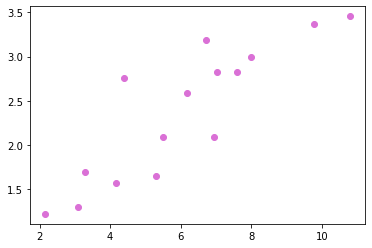

In [93]:
plt.scatter(x,y, color='orchid')
plt.show()

In [117]:
# Navest ćemo dimenzije 
inputSize = 1
hiddenSize = 100
outputSize = 1

In [146]:
# Inicijalizirat ćemo neke početne težine
# Težine ćemo označavati nadalje s w umjesto theta (zbog jednostavnosti i w-weights je uobičajeno :-) )
w1 = np.random.randn(inputSize, hiddenSize)
w2 = np.random.randn(hiddenSize, outputSize)

In [56]:
# Za aktivacijsku funkciju koristit ćemo sigmoid 
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

In [7]:
# Provjerimo dimenzije podataka

print("Ulazni podaci",x.shape)
print("Težine w1", w1.shape)
print("Težine w2", w2.shape)

Ulazni podaci (15, 1)
Težine w1 (1, 100)
Težine w2 (100, 1)


In [147]:
# Algoritam:
learningRate = 1e-4 # npr. 1e-6 premalo

# Crtanje funkcije pogreške
loss_values = []

for i in range(1000):
    
    # Prolazak unaprijed (forward pass): izračunaj predikciju
    # pomnozimo x sa w1 (napravimo linearnu kombinaciju)
    # djelujemo sa aktivacijskom funkcijom
    # pomnozimo sa w2 
    a2 = x.dot(w1) # Pomnozimo x sa svakom težinom
    z2 = sigmoid(a2) # Djelujemo sa aktivacijskom funkcijom - ove vrijednosti tu su sada neuroni u skvirenom sloju
    y_pred = z2.dot(w2) # Pomnozimo sa drugim parom tezina - sada se nalazimo u zadnjem sloju
    
    # Nakon sto smo napravili jedan prolazak unaprijed idemo izracunati pogresku
    loss = 0.5*np.square(y_pred - y).sum() # suma kvadratnih odstupanja
    loss_values.append(loss)
    if i%100==0:
        print ('Pogreska u iteraciji {} iznosi {}'.format(i, loss))
    
    # Na kraju trebamo napraviti backpropagaciju kako bismo izračunali gradijente
    # i ažurirati težine (parametre)
    
    
    # ---- pocetak backprop ------------
    grad_w2 = z2.T.dot((y_pred - y))
    
    grad_w1_ = (y_pred-y).dot(w2.T)
    grad_w1 = x.T.dot((sigmoid(a2)*(1-sigmoid(a2)))*grad_w1_)
    # ---- kraj backprop ------------
    #print(grad_w1)
    #print(grad_w2)
    
    # Ažuriramo težine
    w1 = w1 - learningRate * grad_w1
    w2 = w2 - learningRate * grad_w2

Pogreska u iteraciji 0 iznosi 33.06018287670275
Pogreska u iteraciji 100 iznosi 1.4159082460520016
Pogreska u iteraciji 200 iznosi 1.1448010446957861
Pogreska u iteraciji 300 iznosi 1.055281918073227
Pogreska u iteraciji 400 iznosi 1.0239055519246585
Pogreska u iteraciji 500 iznosi 1.0109252063213352
Pogreska u iteraciji 600 iznosi 1.0038531758643798
Pogreska u iteraciji 700 iznosi 0.9988100964845279
Pogreska u iteraciji 800 iznosi 0.9945897316971813
Pogreska u iteraciji 900 iznosi 0.9908098474702138


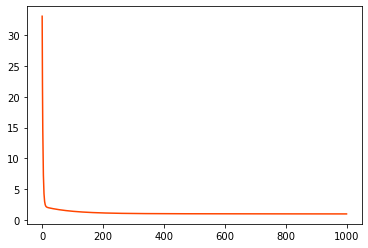

In [148]:
plt.plot(np.arange(0,1000,1), loss_values, color='orangered')
plt.show()

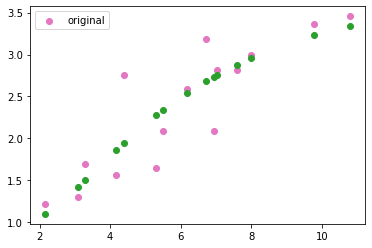

In [155]:
# Na kraju, kako bismo vidjeli što smo dobili prebacit ćemo predikcije u numpy array
# i nacrati ih

predicted = y_pred
plt.scatter(x,y,color='tab:pink', label = "original")
plt.scatter(x,predicted, color = 'tab:green')
plt.legend()
plt.show()

In [156]:
# Analiza mreže
print('Podatak = ',x[0])
print('Mnozimo podatak', x[0], 'sa svim težinama')
print(x[0].dot(w1)[:5], '...')
print('Sve dobivene aktivacijske jedinice napadnemo sa sigmoidom')
print(sigmoid(x[0].dot(w1))[:5], '...')
print('Napravimo linearnu kombinaciju dobivenih aktivacijski jedinica sa težinama w2')
print(sigmoid(x[0].dot(w1)).dot(w2))

Podatak =  [3.3]
Mnozimo podatak [3.3] sa svim težinama
[-5.62925989  1.15125884  3.836115   -0.55910676 -0.81058904] ...
Sve dobivene aktivacijske jedinice napadnemo sa sigmoidom
[0.00357838 0.75974077 0.97887848 0.36375416 0.30776499] ...
Napravimo linearnu kombinaciju dobivenih aktivacijski jedinica sa težinama w2
[1.50662625]


---
---

## Uvod u PyTorch
Napravit ćemo kratki pregled programskog paketa Pytorch kojeg ćemo ubuduće koristiti. <br>
Pytorch je baziran na programskom jeziku Python. Primjenjuje se u metodama dubokog učenja jer koristi mogućnosti GPU-a i pruža veliku fleksibilnost i brzinu. <br>
Proces treniranja modela dubokog učenja je vremenski zahtjevan i njegovo izvođenje na CPU-u dugo traje, stoga je rješenje prebacivanje računanja na GPU. GPU sadrži velik broj jezgri koje su optimizirane za paralelno računanje. <br>

U PyTorch paketu je implementiran veliki broj operacija. Osnovni objekt nad kojim se izvršavaju operacije je tenzor. Tenzori se direktno mogu premještati s CPU na GPU i obratno.<br>

PyTorch sadrži paket autograd koji pruža automatsko računanje gradijenta u neuronskim mrežama koristeći tehnike automatske diferencijacije. Na ovaj način je proces propagacije unatrag za računanje gradijenta pogreške u potpunosti pojednostavljen. 

PyTorch sadrži paket $nn$ koji omogućuje jednostavno slaganje konvolucijskih mreža, automatizira procese računanja i sadrži implementacije velikog broja funkcija pogreške. <br>


<img src="https://venturebeat.com/wp-content/uploads/2019/06/pytorch-e1576624094357.jpg?w=1200&strip=all" width="20%">



In [43]:
import torch

### Primjer 1

In [ ]:
# Proci cemo kroz neke osnovne funkcionalnosti koje ćete koristiti
# i usporediti ih sa dosadašnjima iz numpyja

# Zelimo kreirati vektor sa slučajno generiranim brojevima 
# veličine n1 x n2

n1 = 10
n2 = 2

# Numpy 
x_np = np.random.randn(n1,n2)
# Torch tensor
x_torch = torch.randn(n1,n2)

# Ako pokrenemo kod vidjet ćemo osnovnu razliku
# x_np je array, a x_torch je tenzor - kao što smo rekli na početku, 
# tenzori su osnovni objekti s kojima ćemo raditi

print(type(x_np))
print(type(x_torch))


# Množenje dva tenzora
# Neka su zadani tenzori a i b
# a je 2 x 3, b je 3 x 4
a = torch.randn(2,3)
b = torch.randn(3,4)
print(torch.mm(a,b))
# ili
print(a.mm(b))

# Ispitivanje dimenzija kao i do sada
print(a.shape, b.shape)


---

### Primjer 2

Koristeći neuronsku mrežu pokušat ćemo riješiti jedan jednostavni problem linearne regresije kakav smo upoznali na početku. <br>
Neuronska mreža će imati jednu varijablu na ulazu, skriveni sloj i jednu varijablu u izlaznom sloju. <br>
Koristeći numpy složiti ćemo jednu jednostavnu neuronsku mrežu. 


In [130]:
# Zadani su nam podaci

# Podaci su
x = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], [9.779], [6.182], [7.59], [2.167], [7.042], [10.791], [5.313], [7.998], [3.1]], dtype=np.float32)
y = np.array([[1.7], [2.76], [2.09], [3.19], [2.094], [1.57], [3.366], [2.59], [2.82], [1.221], [2.821], [3.456], [1.65], [2.99], [1.3]], dtype=np.float32)

# No, podatke sada moramo pretvoriti u tenzore
# Postoje dva načina, mi ćemo odabrati prvi
# 1. nacin: napravi deep copy
x_T = torch.tensor(x, dtype = torch.float)
# 2. nacin: napravi shallow copy
#x_train_T = torch.from_numpy(x_train)   

y_T = torch.tensor(y, dtype = torch.float)
              
# Dimenzije neuronske mreže su
inputSize = 1
hiddenSize = 100
outputSize = 1

# Postavimo početne težine na neke slučajno generirane brojeve
w1 = torch.randn(inputSize, hiddenSize, dtype = torch.float, requires_grad = True)
w2 = torch.randn(hiddenSize, outputSize, dtype = torch.float, requires_grad = True)

# Primijetimo dodatni argument koji smo proslijedili
# requires_grad = True <--- to označava da želimo računati gradijent s obzirom
# na te tenzore tijekom prolaska unatrag (backward pass)
    
learningRate = 1e-5

# Algoritam

# Crtanje grafa pogreške
loss_values = [] 
n_iter = 300
for i in range(n_iter):
    # Prolazak unaprijed (forward pass): izračunaj predikciju
    # Ono što ćemo napraviti će biti isto kao i u prethodnom algoritmu 
    # No, razlika je što sada radimo s tenzorima
    # A druga razlika je što nam ne trebaju međukoraci jer nećemo ručno računati
    # gradijent
    
    y_pred_T = x_T.mm(w1).clamp(min = 0).mm(w2)
    
    # Nakon sto smo napravili jedan prolazak unaprijed idemo izracunati pogresku
    loss = (y_pred_T - y_T).pow(2).sum() # suma kvadratnih odstupanja
    loss_values.append(loss.item())
    if i%100==0:
        print ('Pogreska u iteraciji {} iznosi {}'.format(i, loss.item()))
    
    # Sada ćemo napraviti backward propagaciju, izračunati gradijente
    # Korsitit ćemo 'autograd'
    # Poziv sljedeće funkcije će izračunati sve gradijente s obzirom na sve
    # tenzore koji imaju oznaku requires_grad=True
    # Dakle, budući da loss ovisi o tenzorima w1 i w2, a oni imaju tu oznaku jer  smo ih tako kreirali
    # izračunati će se ti gradijenti i bit će spremljeni u w1.grad tj, w2.grad
    
    # Poziv funkcije
    loss.backward()
    
    # Sada ćemo ažurirati težine w
    with torch.no_grad():
        
        w1 -= learningRate * w1.grad
        w2 -= learningRate * w2.grad

        # Manually zero the gradients after updating weights
        w1.grad.zero_()
        w2.grad.zero_()

Pogreska u iteraciji 0 iznosi 5235.91552734375
Pogreska u iteraciji 100 iznosi 3.0047008991241455
Pogreska u iteraciji 200 iznosi 3.0047008991241455


[]

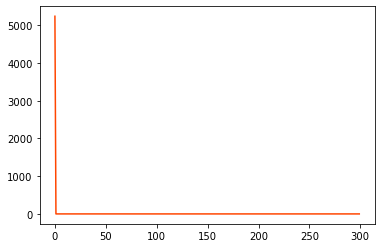

In [131]:
plt.plot(np.arange(0,n_iter,1), loss_values, color='orangered')
plt.plot()

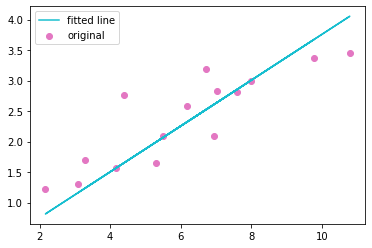

In [133]:
# Na kraju, kako bismo vidjeli što smo dobili prebacit ćemo predikcije u numpy array
# i nacrati ih

predicted = y_pred_T.detach().numpy()
plt.scatter(x_T,y_T,color='tab:pink', label = "original")
plt.plot(x_T,predicted, color = 'tab:cyan',label = "fitted line")
plt.legend()
plt.show()

---

### Primjer 3
Koristeći sljedeće naredbe se vrlo jednostavno može složiti neuronska mreža tako da se navedu slojevi koji se sekvencijalno izvršavaju na zadanom ulazu. Pokazat ćemo na primjeru jednostavne mreže koja sadrži dva linearna sloja. Kreiramo tenzore zadanih veličina s nasumičnim vrijednostima za ulazni  podatak $x$ i njemu pripadni izlazni podatak $y$ .

In [1]:
# Zadani su nam podaci

x = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], [9.779], [6.182], [7.59], [2.167], [7.042], [10.791], [5.313], [7.998], [3.1]], dtype=np.float32)
y = np.array([[1.7], [2.76], [2.09], [3.19], [2.094], [1.57], [3.366], [2.59], [2.82], [1.221], [2.821], [3.456], [1.65], [2.99], [1.3]], dtype=np.float32)

# No, podatke sada moramo pretvoriti u tenzore
# Postoje dva načina, mi ćemo odabrati prvi
# 1. nacin: napravi deep copy
x_T = torch.tensor(x, dtype = torch.float)
# 2. nacin: napravi shallow copy
#x_train_T = torch.from_numpy(x_train)   

y_T = torch.tensor(y, dtype = torch.float)
              
# Dimenzije neuronske mreže su
inputSize = 1
hiddenSize = 100
outputSize = 1

# Koristit ćemo nn paketa
# nn.Sequential je modul koji sadrži druge module i izvršava ih redom

# Ako želimo linearni sloj - ulazni podatak pomnožiti sa svim težinama koristimo
# torch.nn.Linear(inputSize, hiddenSize)

# Ako želimo izračunati ono što smo nazivali z^(2), dakle djelovati na svaki neuron
# aktivacijskom funkcijom zovemo
# torch.nn.ReLu() ili torch.nn.Sigmoid() ili torch.nn.Tanh()
# više na https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity
              
# Ako želimo koristiti neku od standardnih funkcija pogreške koristimo 
# torch.nn.MSELoss() ili nešto drugo https://pytorch.org/docs/stable/nn.html#loss-functions


# Sastavit ćemo neuronsku mrežu na ovaj način

model = torch.nn.Sequential(
        torch.nn.Linear(inputSize, hiddenSize),
        torch.nn.Sigmoid(),
        torch.nn.Linear(hiddenSize, outputSize))

# Odabrat ćemo loss funkciju 
loss_fn = torch.nn.MSELoss()
loss_values = [] 


learningRate = 1e-6
for i in range(500):
    # Prolazak unaprijed (forward pass): izračunaj predikciju
    # Sada je potrebno samo ovo
    y_pred = model(x_T)
    
    
    # Nakon sto smo napravili jedan prolazak unaprijed idemo izracunati pogresku
    loss = loss_fn(y_pred, y_T)
    loss_values.append(loss.item())
    if i%100==0:
        print ('Pogreska u iteraciji {} iznosi {}'.format(i, loss.item()))
    
    # Sada ćemo napraviti backward propagaciju, izračunati gradijente
    # Prvo ćemo ih sve postaviti na 0
    model.zero_grad()
    # Poziv funkcije
    loss.backward()
    
    # Sada ćemo ažurirati težine w
    with torch.no_grad():
        # Proći ćemo kroz sve težine u našem modelu
        for w in model.parameters():
            w -= learningRate * w.grad


NameError: name 'np' is not defined

In [ ]:
plt.plot(np.arange(0,500,1), loss_values)
plt.show()

---
---

## Zadatak 4


In [17]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
import time
import numpy as np
import matplotlib.pyplot as plt
import torch

In [9]:
# Ucitavamo podatke
data = load_digits()

# Dijelimo podatke na skup za treniranje i testiranje
x_train, x_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size = 0.3)
print('U trening skupu podataka imamo', x_train.shape[0], ', a u testnom ', x_test.shape[0])

U trening skupu podataka imamo 1257 , a u testnom  540


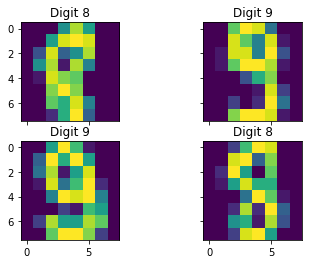

In [11]:
# Pogledajmo podatke
a,b,c,d = np.random.randint(0,x_train.shape[0],4)

fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(x_train[a].reshape(8,8))
axs[0, 0].set_title('Digit {}'.format(y_train[a]))
axs[0, 1].imshow(x_train[b].reshape(8,8))
axs[0, 1].set_title('Digit {}'.format(y_train[b]))
axs[1, 0].imshow(x_train[c].reshape(8,8))
axs[1, 0].set_title('Digit {}'.format(y_train[c]))
axs[1, 1].imshow(x_train[d].reshape(8,8))
axs[1, 1].set_title('Digit {}'.format(y_train[d]))

for ax in axs.flat:
    ax.label_outer()

In [18]:
# Prebacimo podatke u tenzore
x_train = torch.tensor(x_train,dtype=torch.float)
x_test = torch.tensor(x_test,dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)


In [19]:
# dimenzije podatka, tj. koliko featura svaki podatak ima
print('Podaci imaju', x_train.shape[1], ' featurea. ')

Podaci imaju 64  featurea. 


In [20]:
# parametri
inp = 64
hid1 = 100
hid2 = 50
out = 10

# -----
loss_fn = torch.nn.CrossEntropyLoss()

In [21]:
model = torch.nn.Sequential(torch.nn.Linear(inp,hid1),
                            torch.nn.ReLU(), 
                            torch.nn.Linear(hid1,hid2),
                            torch.nn.Sigmoid(),
                            torch.nn.Softmax(1)
                           )

In [24]:
x_train.shape

torch.Size([1257, 64])

In [22]:

# Primijetimo:
y_pred = model(x_train)
print('Dimenzija predikcije: ', y_pred.shape)

# Svakom podatku je pridruzen vektor velicine 10, kao 10 klasa
print('Predikcije za prvi podatak', y_pred[0])

# Te vrijednosti su vjerojatnosti pripadnosti podataka nekoj od klasa
print("Suma je = ", torch.sum(y_pred[0]).item())

Dimenzija predikcije:  torch.Size([1257, 50])
Predikcije za prvi podatak tensor([0.0150, 0.0137, 0.0146, 0.0190, 0.0153, 0.0328, 0.0150, 0.0327, 0.0228,
        0.0264, 0.0275, 0.0322, 0.0213, 0.0296, 0.0135, 0.0273, 0.0131, 0.0231,
        0.0176, 0.0185, 0.0171, 0.0239, 0.0168, 0.0183, 0.0216, 0.0172, 0.0146,
        0.0170, 0.0242, 0.0217, 0.0145, 0.0197, 0.0139, 0.0203, 0.0143, 0.0152,
        0.0208, 0.0160, 0.0316, 0.0213, 0.0283, 0.0142, 0.0149, 0.0158, 0.0175,
        0.0156, 0.0161, 0.0203, 0.0165, 0.0302], grad_fn=<SelectBackward>)
Suma je =  1.0


In [261]:
# Potencijalne greske : 
# target varijable moraju biti cijeli brojevi
# kako provjeriti tip podatka u tenzoru?
print(y_pred.dtype)
print(y_train.dtype)

torch.float32
torch.int64


In [215]:
y_pred.shape, y_train.shape

(torch.Size([1257, 10]), torch.Size([1257]))

In [273]:
def run():
    learningRate = 1e-0

    time_start = time.time()
    print('--------- Starting with {} ---------')
    for iter in range(1,2000):
        y_pred = model(x_train)
        loss = loss_fn(y_pred, y_train)

        if iter % 100 == 0: 
            print(iter, loss.item())

        model.zero_grad()
        loss.backward()

        with torch.no_grad():
            for param in model.parameters():
                param -= learningRate*param.grad
    time_end = time.time()
    print('Required time: ',  time_end - time_start)
    
run()

--------- Starting with cuda:0 ---------
100 3.888310194015503
200 3.884942054748535
300 3.883727788925171
400 3.8831422328948975
500 3.8823001384735107
600 3.8816401958465576
700 3.881387710571289
800 3.8812036514282227
900 3.8810508251190186
1000 3.8809280395507812
1100 3.880828380584717
1200 3.880746841430664
1300 3.8806681632995605
1400 3.880603313446045
1500 3.880542755126953
1600 3.8804919719696045
1700 3.880448341369629
1800 3.88040828704834
1900 3.8803741931915283
Required time:  16.310251474380493


In [244]:
# Izracunajmo predikcije i usporedimo sa stvarnim vrijednostima
test_prediction = model(x_test)
test_prediction = torch.max(test_prediction, axis=1).indices
print(accuracy_score(y_test, test_prediction.detach().numpy()))

0.9481481481481482


---

Korištenje grafičke kartice za računanje

In [263]:
# ispitaj postoji li dostupna
torch.cuda.is_available()

True

In [264]:
# Ako postoji dostupna postavi
if torch.cuda.is_available():
    device = torch.device("cuda:0")  # you can continue going on here, like cuda:1 cuda:2....etc. 
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

Running on the GPU


In [265]:
# -----------------------
# prebaci na GPU

# model
model.to(device)

# podatke
x_train = x_train.to(device)
y_train = y_train.to(device)

In [266]:
run()

--------- Starting ---------
100 3.880413770675659
200 3.8803722858428955
300 3.8803353309631348
400 3.880302667617798
500 3.88027286529541
600 3.8802452087402344
700 3.880220651626587
800 3.880197048187256
900 3.880176544189453
1000 3.8801567554473877
1100 3.8801376819610596
1200 3.8801193237304688
1300 3.880103826522827
1400 3.8800876140594482
1500 3.8800735473632812
1600 3.8800580501556396
1700 3.880044460296631
1800 3.8800315856933594
1900 3.880019187927246
Required time:  4.8416008949279785
